<b style="font-size:35px;"><center>Virtual Applied Data Science Training Institute<br /><br>(VADSTI)</center></b>

 <hr style="border:0.5px solid red" />
 
<center><img src="Figures/cover_to_intro_day1_slide.PNG" style="float: center; height: 350px"></center>

---

<p /><br />


<center><b style="font-size:40px; color:#000EFF;"><em>Python Code Along -- Instructor's Solutions File</em></b></center>

<hr style="border:0.1px solid red; width: 50%;" />

### Lesson Objectives

After completing the series you will be able to use **Python** and the data provided in `Module 3, Day 1 slide #7` to implement the following tasks:

1. Estimating Statistics -- <b style="font-size:14px; color:#FE0000;"><em>Code-along -- Break 10 minutes</em></b>
    - [Load dBP sample data](#slide7) -  (_slide 7_)
    - What is the dBD mean -  (_slide 8_)
    - What is the dBP standard deviation - (_slide 9_)
    - Write your own function to compute sample statistics?
    
<p \>
    
2. Inferential statistical analysis
	- [Sampling distribution of diastolic BP](#slide17) - (_slide 17_)
	- Generate random sample from the dBP data -  (_slide 17_)
	- Compute variability statistics by drawing random samples from the dBP data (_slides 19 & 20_)
    - Compute confidence interval (_slides 21_)

<p \>

3. [Hypothesis Testing](#slide28) - (_slide 28_) <b style="font-size:14px; color:#FE0000;"><em>Code-along -- Break 10 minutes</em></b>
	- [z-test for difference in two independent means](#slide33) - (_slide 33_)
	- Categorical outcome (2 categories) - (_slide 37_)
	- Difference in independent proportions - (_slides 38, 39_)
    - [Compute $\chi^2$ value for a 2x2 contingency table](#slide42) - (_slides 42_)


<p \>

4. [Statistical Methods](#slide49) - (_slide 49_)
	- Correlation -- Fitting a Linear Model on a given dataset - (_slide 52_)
	- Add confidence boundaries (_slide 54_)


<p \>

5. Nonparametric statistics](#slide66) - (_slide 66_)
	- [Bootstrap – randomly select an observation from sample data with replacement](#slide66) - (_slide 68_)
    - [Jackknife – leave-out-one](#slide69) - (_slide 69_)



<center><b style="font-size:25px; color:#00FE00;">Required packages</b></center>

In [1]:
%%bash
echo "installing required packages ..."

exit    #<<<----   remove this run the intallation if necessary 

sudo pip3 install --upgrade pip  # just make sure to upgrade pip
sudo pip3 install pandas         # makes it easy working with structured (tabular and time series) data 
sudo pip3 install numpy          # "Num Pie": numeric computing library used for working with arrays
sudo pip3 install scipy          # "Sigh Pie": scientific computing library for mathematics, science, and engineering

#Plotting
sudo pip3 install matplotlib     # mainly deployed for basic plotting, fewer syntax with lots of default themes
sudo pip3 install seaborn        # a Python data visualization library based on matplotlib


#sudo pip3 install random        # built-in module to generate the pseudo-random variables
sudo pip3 install statistics     # provides functions for calculating mathematical statistics of numeric data
sudo pip3 install xlrd           # a library for reading data and formatting information from Excel 
sudo pip3 install datatable      # package for manipulating 2-dimensional tabular data structures (aka data frames

sudo -H pip3 install statsmodels # provides classes and functions for the estimation of many different statistical model
sudo -H pip3 install sklearn  # a machine learning library for Python, including several regression, classification and clustering algorithms


installing required packages ...


 <hr style="border:0.5px solid red" />
 
 <center><b style="font-size:18px; color:#FE0000;"><em>* * * Instructors' Python Coding Exercises Solution Starts at this point * * *</em></b></center>

In [2]:
#import libraries
import pandas as pd     
import numpy as np      
import random

import seaborn as sns

# Forces matplotlib graphics to show up inline
%matplotlib inline 

<a id="slide7"></a>

### 1.  Estimating Statistics

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slides 6 through 9</em></b> to complete **Task 1** for Module 3 Day 1


#### 1.A  Load the `dBP` and do an initial examination the underlying distribution.



In [3]:
dBP = np.array([
73, 42, 73, 67, 84, 75, 80, 78, 64, 73, 70, 92,
59, 77, 65, 69, 91, 71, 69, 62, 76, 89, 91, 79,
67, 76, 66, 80, 98, 70, 74, 71, 74, 59, 84, 73,
68, 74, 70, 72, 84, 65, 81, 54, 67, 83, 87, 63,
68, 93, 92, 71, 95, 69, 98, 74, 90, 100, 60, 82,
75, 91, 72, 82, 67, 71, 61, 94, 75, 76, 66, 76,
97, 58, 72, 57, 74, 65, 79, 73, 91, 79, 63, 80,
73, 92, 62, 82, 73, 90, 73, 83, 64, 70, 60, 79,
94, 73, 78, 99, 71, 90, 82, 74, 82, 77, 71, 64,
68, 73, 86, 89, 100, 77, 88, 72, 56, 85, 90, 88,
55, 68, 73, 85, 80, 69, 62, 73, 78, 73, 84, 70,
65, 81, 85, 90, 89, 64, 81, 77, 91, 95, 86, 73
])

#----
# alternatively you may use
dBP = np.array( pd.read_excel("Data.xls", sheet_name=0) ).reshape(-1)
dBP

array([ 73,  59,  67,  68,  68,  75,  97,  73,  94,  68,  55,  65,  42,
        77,  76,  74,  93,  91,  58,  92,  73,  73,  68,  81,  73,  65,
        66,  70,  92,  72,  72,  62,  78,  86,  73,  85,  67,  69,  80,
        72,  71,  82,  57,  82,  99,  89,  85,  90,  84,  91,  98,  84,
        95,  67,  74,  73,  71, 100,  80,  89,  75,  71,  70,  65,  69,
        71,  65,  90,  90,  77,  69,  64,  80,  69,  74,  81,  98,  61,
        79,  73,  82,  88,  62,  81,  78,  62,  71,  54,  74,  94,  73,
        83,  74,  72,  73,  77,  64,  76,  74,  67,  90,  75,  91,  64,
        82,  56,  78,  91,  73,  89,  59,  83, 100,  76,  79,  70,  77,
        85,  73,  95,  70,  91,  84,  87,  60,  66,  63,  60,  71,  90,
        84,  86,  92,  79,  73,  63,  82,  76,  80,  79,  64,  88,  70,
        73], dtype=int64)

In [4]:
#1a: Compute the dBP mean -- PowerPoint slide 8

# Using formular on slide 8 of HowardU_Introduction to statistics3-4-21.pptx 
sum_dBP          = dBP.sum()     #  sum all the elements in the dBP list
num_elements_dBP = len(dBP)      #  same as /144
dBP_mean = sum_dBP / num_elements_dBP

#Alternatively use inbuild function mean() from numpy
mean_dBP = np.mean(dBP)          # sample mean


print("\n mean_dBP = %.1f\n" %dBP_mean)


 mean_dBP = 76.3



In [5]:
#1b: Compute the dBP standard deviation -- PowerPoint slide 9
import numpy as np

variance = (( dBP - np.mean(dBP) )**2 ).sum()/(144 -1)
sd = np.sqrt(variance)

print("\nSample variance using slide 9 = %.2f\n    Sample Standard Deviation = %.2f\n" % (variance, sd))


Sample variance using slide 9 = 123.65
    Sample Standard Deviation = 11.12



In [6]:
#c. Why divide by (144 – 1)?  -- PowerPoint slide 9

# Unbias estimator -- fundamental law of Numerical Statistics

In [7]:
# Alternately, for 1a, 1b, 1c you can use the "statistics" package
#!sudo pip3 install statistics
import statistics 

# Inbuild sample variance and sample standard deviation
statistic_mean = statistics.mean(dBP)
statistic_var = statistics.variance(dBP)
statistic_std = statistics.stdev(dBP)

print("a.    Sample mean using using statistic.mean = %.2f\n\
b. Sample variance using using statistic.var = %.2f\n\
c.          Sample Standard Deviation using  = %.2f\n\n" % (statistic_mean, statistic_var, statistic_std))


a.    Sample mean using using statistic.mean = 76.00
b. Sample variance using using statistic.var = 123.00
c.          Sample Standard Deviation using  = 11.09




In [8]:
#Challenge 1.1: Write your own functions to compute the sample mean and standard deviation of dBP sample data

# Our own function 
def mean_var_sd(data):
  n = len(data)
  #mean segment
  mean = sum(data) / n
  #variance segment
  deviations = [(x - mean) ** 2 for x in data]
  variance = sum(deviations) / n
  #std_dev segment
  std_dev = np.sqrt(variance)
  return mean, variance, std_dev


#test
result = mean_var_sd(dBP)

print("\n\nResult from own function:\n\
a.    Sample mean  =  %.2f\n\
b. Sample variance = %.2f\n\
c.  Sample Std_dev =  %.2f\n\n" % (result))





Result from own function:
a.    Sample mean  =  76.32
b. Sample variance = 122.79
c.  Sample Std_dev =  11.08




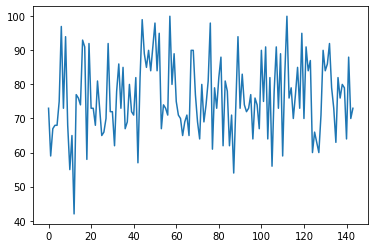

In [9]:
#Challenge 1.2: Plot the distribution of the dBP data
import matplotlib.pyplot as plt 
  
plt.plot(dBP) 
plt.show() 


C:\ProgramData\Anaconda3\envs\thesis_tensorflow_cpu_gpu_2_2_0_9_21_2020\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

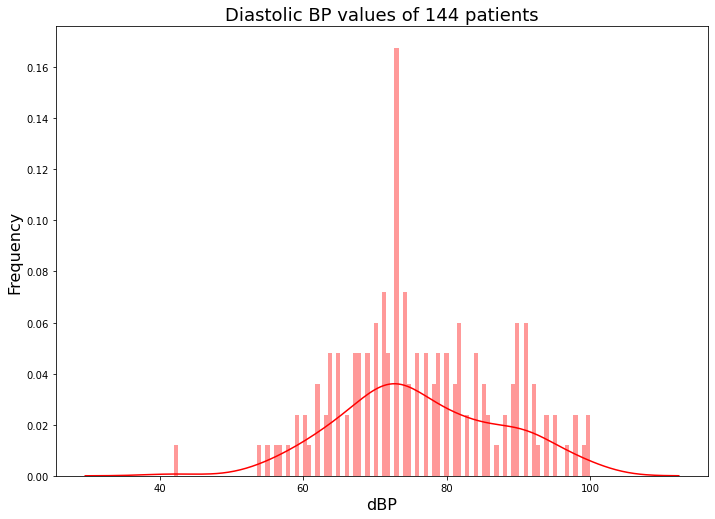

In [10]:
#OR
# Let’s plot the distribution of Treatment and control groups:
import seaborn as sns

#increase fifure size
a4_dims = (11.7, 8.27)


#Multiply (2) plots on 1 figure
fig, axs = plt.subplots(figsize=a4_dims)

sns.distplot(dBP, kde=True, color='red', bins=100)
plt.title('Diastolic BP values of 144 patients', fontsize=18)
plt.xlabel('dBP', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

    
<hr style="border:0.1px solid gray; width: 25%;" />

<b style="font-size:40px; color:#822c97">References</b>

* <https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/>

* <https://www.askpython.com/python/examples/mean-and-standard-deviation-python>

***    
    
    
<p /><p />

<hr style="border:0.1px solid #822c97; width: 50%;" />

<center><b style="font-size:25px; color:##556B2F">CONGRATULATION!!!<br>YOU HAVE SUCCESSFULLY COMPLETED CODE ALONG <br />TASK 1 FOR MODULE 3 Day 1</b></center>

<a id="slide17"></a>

<hr style="color:#FE0000;border:0.5px solid red" />


### 2.  Inferential statistical analysis

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slides 12 through 21</em></b> to complete **Task 2** for Module 3 Day 2

<p \>

#### 2.A Recall: Research sample mean (x) ~ population mean ($\mu$) Inferential statistical analysis -- <b style="font-size:15px; color:#FE0000;"><em> Slide 16</em><b/>

<p \>
 
<center><img src="Figures/sample_and_population_mean.PNG" style="float: center; height: 350px"></center>




In [11]:
# Example: Use the following code segment to extract (draw) 2 random numbers from between 0 and 9

import random

random.seed(4)        #to ensure a repeatable outcome

data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  

# Draw the samples indirectly from the data
random.sample(population=data, k=2)


[3, 4]

In [12]:
#2a Expand on the example above to draw 1 set of 5 random data from the dBP data (_slide 17_)

random.seed(4)        #to ensure a repeatable outcome

#insert your code here 

# 2a method 1 of 2: draw the samples directly
random.sample( list(dBP), 5)   #has to be a list


[75, 61, 66, 75, 84]

In [13]:
#2a: Method 2 of 2: draw the samples indirectly usingthe index
#random.sample( list(dBP), 5)   #has to be a list

random.seed(4) 

n = 5           #sample size
l = len(dBP)    #length dBP
index = np.random.randint(0, l , size=n)

sample = dBP[index] 

print(f'  Index: {index}  |   sample: {sample}')


  Index: [  0 124  29 109   1]  |   sample: [73 60 72 89 59]


In [14]:
#2b Expanding on your result in 2a, draw 12 sets of random samples each of size 5 from the dBP data 
#   and print the resulting samples. Use random.seed(4)
import random

#initialize temporary variables
n = 5                 #sample size
l = len(dBP)          #length dBP
num_samples = 12      #12 samples
random.seed(4)        #repeatable outcome

#setup output
print("\n\n          Sample size (n = %d) \n         _____________________" %n)

#compute and print values
for i in range(num_samples):
    # use 4 as a seed value  gets you the same values every time
    #random.seed(4)
    # get sample list of 5 items
    sample_list = random.sample(list(dBP), n)
    #print(f'{sample_list}  mean: {np.mean(sample_list):.2f}')
    print("%5d    %5s " % ((i+1), sample_list))

#draw bottom line
print("          _____________________")



          Sample size (n = 5) 
         _____________________
    1    [75, 61, 66, 75, 84] 
    2    [72, 81, 91, 75, 91] 
    3    [64, 74, 74, 71, 79] 
    4    [76, 74, 69, 99, 70] 
    5    [90, 74, 97, 65, 77] 
    6    [91, 57, 73, 74, 77] 
    7    [68, 71, 67, 90, 65] 
    8    [89, 65, 91, 64, 68] 
    9    [64, 98, 59, 74, 73] 
   10    [84, 91, 56, 73, 69] 
   11    [59, 70, 82, 89, 79] 
   12    [65, 65, 73, 73, 64] 
          _____________________


In [15]:
#2c Expanding on your result in 2b, by printing the mean of each of the random sample next the 
# sample values similar to data sampling output on slide 17. Use random.seed(4)

import random

#initialize temporary variables
n = 5                 #sample size
l = len(dBP)          #length dBP
num_samples = 25      #25 samples
random.seed(4)        #repeatable outcome

#setup output
print("\n\n          Sample size (n = %d)    |    Mean\n         ________________________|___________" %n)

#compute and print values
for i in range(num_samples):
    # use 4 as a seed value  gets you the same values every time
    #random.seed(4)
    # get sample list of 5 items
    sample_list = random.sample(list(dBP), n)
    #print(f'{sample_list}  mean: {np.mean(sample_list):.2f}')
    print("%5d    %5s          %.2d " % ((i+1), sample_list, np.mean(sample_list)))

#draw bottom line
print("          ________________________|___________")



          Sample size (n = 5)    |    Mean
         ________________________|___________
    1    [75, 61, 66, 75, 84]          72 
    2    [72, 81, 91, 75, 91]          82 
    3    [64, 74, 74, 71, 79]          72 
    4    [76, 74, 69, 99, 70]          77 
    5    [90, 74, 97, 65, 77]          80 
    6    [91, 57, 73, 74, 77]          74 
    7    [68, 71, 67, 90, 65]          72 
    8    [89, 65, 91, 64, 68]          75 
    9    [64, 98, 59, 74, 73]          73 
   10    [84, 91, 56, 73, 69]          74 
   11    [59, 70, 82, 89, 79]          75 
   12    [65, 65, 73, 73, 64]          68 
   13    [92, 82, 70, 54, 69]          73 
   14    [98, 91, 56, 84, 100]          85 
   15    [69, 90, 83, 83, 62]          77 
   16    [70, 98, 62, 65, 74]          73 
   17    [80, 64, 75, 62, 78]          71 
   18    [89, 74, 85, 97, 55]          80 
   19    [83, 73, 69, 81, 68]          74 
   20    [62, 69, 72, 56, 92]          70 
   21    [81, 91, 76, 74, 73]          79 
   22

In [16]:
#2d Compute the (i) mean, (ii) SEM = SD(sample_data)/sqrt(n=len(sample_data)) -- slide 19

import numpy as np
import scipy.stats       #the scientific computing library
import statistics

sample1 = [72, 82, 73, 90, 81]
sample2 = [89, 90, 77, 80, 82]

mean_sample1 =   np.mean(sample1)
mean_sample2 =   np.mean(sample2)

n = len(sample1)

SEM_sample1 = statistics.stdev(sample1) * (1/np.sqrt(n))
SEM_sample2 = statistics.stdev(sample2) * (1/np.sqrt(n))

print("\n\nResults:\n\
a.    Sample1:  %s   | size: %d |   mean sample1: %.0f   | SEM sample1: %.0f\n" % \
      (sample1, n, mean_sample1, SEM_sample1))
print("\
b.    Sample2:  %s   | size: %d |   mean sample2: %.0f   | SEM sample2: %.0f\n" % \
      (sample2, n, mean_sample2, SEM_sample2))



Results:
a.    Sample1:  [72, 82, 73, 90, 81]   | size: 5 |   mean sample1: 80   | SEM sample1: 3

b.    Sample2:  [89, 90, 77, 80, 82]   | size: 5 |   mean sample2: 84   | SEM sample2: 3



In [17]:
#Challenge 2.1 Use the formula on slide 20 to compute the 95% confidence interval for sample1 and sample2

normal_d = 2
LB_sample1 = mean_sample1 - (SEM_sample1 * normal_d)   #   (2 is standard deviation units of the normal distribution).
UB_sample1 = mean_sample1 + (SEM_sample1 * normal_d)    

LB_sample2 = mean_sample2 - (SEM_sample2 * normal_d) 
UB_sample2 = mean_sample2 + (SEM_sample2 * normal_d) 

#Compare your results to those obtained in the first 2 lines of the PowerPoint slide 20
print("\n\nResults:\n\
a.    Sample1:  %s   | size: %d |   mean: %.0f   | SEM: %.0f   | LB: %.0f  |  UB: %.0f\n" % \
      (sample1, n, mean_sample1, SEM_sample1, LB_sample1, UB_sample1))
print("\
b.    Sample2:  %s   | size: %d |   mean: %.0f   | SEM: %.0f   | LB: %0.f  |  UB: %0.f\n" % \
      (sample2, n, mean_sample2, SEM_sample2, LB_sample2, UB_sample2))                                   



Results:
a.    Sample1:  [72, 82, 73, 90, 81]   | size: 5 |   mean: 80   | SEM: 3   | LB: 73  |  UB: 86

b.    Sample2:  [89, 90, 77, 80, 82]   | size: 5 |   mean: 84   | SEM: 3   | LB: 79  |  UB: 89



In [18]:
## 2.1 Alternative solution use scipy
#So we can be a bit creative by defining a CI function

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, sem = np.mean(a), scipy.stats.sem(a)
    h = sem * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, sem, m-h, m+h
    
#Test the the function function
sample1 = [72, 82, 73, 90, 81 ]   # slide 20
sample2 = [89, 90, 77, 80, 82 ]

mci1 = mean_confidence_interval(sample1)
mci2 = mean_confidence_interval(sample2)

#print

print("        Sample            |      Mean   |    SEM    |    LB    |    UB ") 
print("  ----------------------------------------------------------------------")
print("   %s   |      %0.f     |     %0.f     |    %0.f    |    %0.f" % (sample1, mci1[0], mci1[1], mci1[2], mci1[3] ) )
print("   %s   |      %0.f     |     %0.f     |    %0.f    |    %0.f" % (sample2, mci2[0], mci2[1], mci2[2], mci2[3] ) )



        Sample            |      Mean   |    SEM    |    LB    |    UB 
  ----------------------------------------------------------------------
   [72, 82, 73, 90, 81]   |      80     |     3     |    70    |    89
   [89, 90, 77, 80, 82]   |      84     |     3     |    77    |    91


#### 2.B Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slide 20</em><b/>

<p \>
 
<center><img src="Figures/table_slide20.PNG" style="float: center; height: 420px"></center>


In [19]:
#Challenge 2.2 Generate a table similar to slide 20 USING THE dBP data for 10 samples each of size 5, 


# Store in a nice table (Pandas Dataframe will do)
import pandas as pd  
import random

random.seed(4)  #repeatable outcome

n = 5

iterations = 25   # 9      ###<<<<   change this for challenge 2.3

dBP_samples_list = [ random.sample(list(dBP), n) for i in range(iterations) ]

column_names = {0:'x1', 1:'x2', 2:'x3', 3:'x4', 4:'x5'}

#push data to dataframe
dBP_samples_df = pd.DataFrame(dBP_samples_list, dtype = float)

#rename columns
dBP_samples_df.rename( columns = column_names, inplace=True)

#add sample mean column
dBP_samples_df['mean'] = dBP_samples_df.mean(axis=1)


# Print only Sample, Mean, SEM, LB, and UB values

## Apply funcution to dataframe

#copy the dataframe
dBP_samples_df_slide20 = dBP_samples_df.copy()


# Apply over all columns x1:x5
ci_column_names = ["Mean", "SEM",  "LB", "UB"]

##  Next We apply the function to the dataframe
## See pandas.DataFrame.apply for examples -- 
#            https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html 
#            https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/
c = dBP_samples_df_slide20.iloc[:,:5].apply(mean_confidence_interval, axis=1)

dBP_samples_df_slide20[ci_column_names] = pd.DataFrame(list(c.values))       # Take a note of this trick. List is always the way to go

print("\n\n  type(dBP_samples_df_slide20) is : %s\n--\n\nContent:" % (type(dBP_samples_df_slide20)))
dBP_samples_df_slide20



  type(dBP_samples_df_slide20) is : <class 'pandas.core.frame.DataFrame'>
--

Content:


,x1,x2,x3,x4,x5,mean,Mean,SEM,LB,UB
0,75.0,61.0,66.0,75.0,84.0,72.2,72.2,3.992493,61.115062,83.284938
1,72.0,81.0,91.0,75.0,91.0,82.0,82.0,3.949684,71.033920,92.966080
2,64.0,74.0,74.0,71.0,79.0,72.4,72.4,2.461707,65.565206,79.234794
3,76.0,74.0,69.0,99.0,70.0,77.6,77.6,5.500909,62.327028,92.872972
4,90.0,74.0,97.0,65.0,77.0,80.6,80.6,5.732364,64.684405,96.515595
5,91.0,57.0,73.0,74.0,77.0,74.4,74.4,5.418487,59.355869,89.444131
6,68.0,71.0,67.0,90.0,65.0,72.2,72.2,4.554119,59.555739,84.844261
7,89.0,65.0,91.0,64.0,68.0,75.4,75.4,6.004998,58.727453,92.072547
8,64.0,98.0,59.0,74.0,73.0,73.6,73.6,6.712675,54.962628,92.237372
9,84.0,91.0,56.0,73.0,69.0,74.6,74.6,6.071244,57.743525,91.456475


In [20]:
#Challenge 2.3 Expand on challenge 2.2 by increasing each of the 10 samples from 
#              (i) 5 to 15 random dBP values
#              (i) 5 to 25 random dBP values
#              (i) 5 to 50 random dBP values

# This time, Print only Sample_size, Mean, SEM, LB, and UB values, and document any 
# interesting findings you may observation


#iterations = 9      ###<<<<   change this in challenge 2.2 for challenge 2.3

In [21]:
# Challenge 2.4: Find how many time the mean is included in the sample means in either challenge 2.2 or 2.3

dp= 0

print("\n Number of samples with mean == mean(dBP) = %d\n---\n" % len(dBP_samples_df_slide20[ round(dBP_samples_df_slide20['Mean'], dp) ==  round(np.mean(dBP), dp) ] ) )

dBP_samples_df_slide20[ round(dBP_samples_df_slide20['Mean'], dp) ==  round(np.mean(dBP), dp) ]


 Number of samples with mean == mean(dBP) = 1
---



,x1,x2,x3,x4,x5,mean,Mean,SEM,LB,UB
10,59.0,70.0,82.0,89.0,79.0,75.8,75.8,5.190376,61.389207,90.210793


<hr style="border:0.1px solid gray; width: 25%;" />

<b style="font-size:40px; color:#822c97">References</b>

* <https://pynative.com/python-random-sample/>
    
* <https://note.nkmk.me/en/python-random-choice-sample-choices/>

    
    
<p /><p />

<hr style="border:0.1px solid #822c97; width: 50%;" />

<center><b style="font-size:25px; color:##556B2F">CONGRATULATION!!!<br>YOU HAVE SUCCESSFULLY COMPLETED CODE ALONG <br />TASK 2 FOR MODULE 3 Day 1</b></center>




<a id="slide28"></a>

<hr style="color:#FE0000;border:0.5px solid red" />


### 3.  Hypothesis Testing 



<a id="slide33"></a>

#### 3.A  t-test for difference in two independent means

<p />

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slides 28 through 39</em></b> to complete **Task 3A** for Module 3 Day 2


####  Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slide 28</em><b/>
<p \>
 
<center><img src="Figures/slide34.PNG" style="float: center; height: 360px"></center>



   Treatment  Control
0         80       84
1         88       90
2         76       86
3         77       77
4         84       93


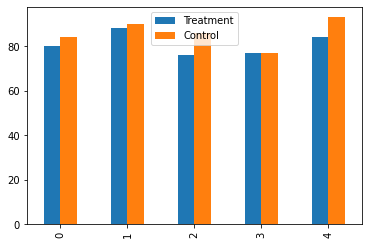

In [22]:
#3a Compute t-test for difference in two independent means shown on slide 34 


# Improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Given data
Treatment = [80,  88,  76,  77,  84]       # Mean = 81
Control   = [84,  90,  86,  77,  93]       # Mean = 86

#Generating a Pandas DataFrame for the 2 groups
Treatment_series = pd.Series(Treatment) 
Control_series = pd.Series(Control) 
  
frame = { 'Treatment': Treatment_series, 'Control': Control_series } 

# Resulting Dataframe
data = pd.DataFrame(frame) 

#------------
#Print resulting dataframe
print(data) 

#--------------
#Plot a density plot on Treatment and Contril datasets
# We plot data on graph

import pandas as pd 
import matplotlib.pyplot as plt 
  
data.plot.bar() 
plt.show() 



C:\ProgramData\Anaconda3\envs\thesis_tensorflow_cpu_gpu_2_2_0_9_21_2020\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\thesis_tensorflow_cpu_gpu_2_2_0_9_21_2020\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Control', ylabel='Density'>

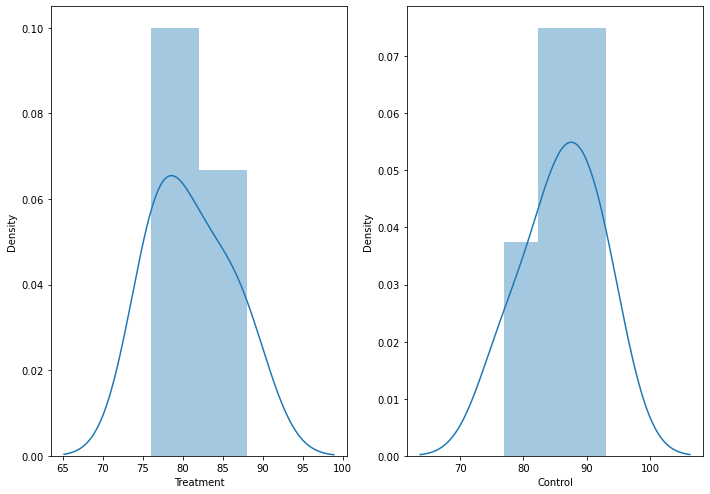

In [23]:
#----
##// alternatively
# Let’s plot the distribution of Treatment and control groups:
import seaborn as sns

#increase fifure size
a4_dims = (11.7, 8.27)


#Multiply (2) plots on 1 figure
fig, axs = plt.subplots(ncols=2, figsize=a4_dims)

sns.distplot(data.Treatment, ax=axs[0])
sns.distplot(data.Control, ax=axs[1])



In [24]:
#Compute a 95% 2-Tail z-test for the difference in Population Proportoertions
import scipy.stats as ss

# At last, we will perform the t-test -- test the sample means

t_stat, p_val= ss.ttest_ind(data.Treatment, data.Control)

print("\n\n  Treatment data: %s  |  Control data: %s |   t-stat: %.5f    |   p-value: %.5f\n---\n\n" \
      % ( data.Treatment.values, data.Control.values, t_stat, p_val) )

#----
#State the outcome of your test under H0




  Treatment data: [80 88 76 77 84]  |  Control data: [84 90 86 77 93] |   t-stat: -1.41421    |   p-value: 0.19502
---




Question: So what does all this mean for our $H0/H1$ Testing?  

### Checheck your response against instructor's PowerPoint **slide 36**

* Here, our p-value is **GREATER THAN the significance level i.e 0.05**. 

* Hence, we can fail to reject the null hypothesis. 

* This means `There is no difference between the means of the Treatment and Control groups (i.e., chance)`
 

<a id="slide39"></a>


#### 3B.  Diffences in independed proportions ($\chi^2$)

<p />

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slide 39</em></b> to complete **Task 3B** for Module 3 Day 2


####  Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slide 39</em><b/>
<p \>
 
<center><img src="Figures/slide39.PNG" style="float: center; height: 360px"></center>




In [25]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

#Using the observation on slide 39, compute the z-test of diffences in proportions for the 2 samples

#                 A    B
count = np.array([84,  72])
nobs = np.array([184,  202])

#ztest
stat, pval = proportions_ztest(count, nobs)
print("\nz = %.4f      |    p = %.4f (two-sided)\n---\n\n" % (stat, pval))


z = 2.0014      |    p = 0.0454 (two-sided)
---




<a id="slide42"></a>


#### 3.C  Chi Square ($\chi^2$)

<p />

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slide 42</em></b> to complete **Task 3C** for Module 3 Day 2


####  Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slide 28</em><b/>
<p \>
 
<center><img src="Figures/Slide42.PNG" style="float: center; height: 280px"></center>


In [26]:
# That is:
E1 = 184*156/386; E2 = 184*230/386; E3 = 202*156/386; E4 = 202*230/386
chi2 = 1/E1*(84-E1)**2  +  1/E2*(100-E2)**2  +  1/E3*(72-E3)**2  +  1/E4*(130-E4)**2
chi2

4.005452239276572

In [27]:
#3c Verify the chi square value computed on slide 42
import numpy as np
from scipy import stats

#data for the contingency table
table = np.array([
    [ 84, 100],
    [ 72, 130]
])

#table_col_sum = ???
#table_row_sum = ???
#table_sum = ???

table_col_sum = np.sum(table, axis=0)      #array([156, 230])          
table_row_sum = np.sum(table, axis=1)      #array([184, 202])
table_sum = np.sum(table) 


print("\n Col sums: %s   | Row sums: %s   |   Row and Col sum: %s" %\
      (table_col_sum, table_row_sum, table_sum))




 Col sums: [156 230]   | Row sums: [184 202]   |   Row and Col sum: 386


In [28]:
#--
#Compute E
#                E1           E2           E3           E4
#E = [ 74.3626943 109.6373057  81.6373057 120.3626943]
E = ([ table_col_sum * table_row_sum[0], table_col_sum * table_row_sum[1] ] / table_sum ).reshape(-1)
print(E)

#Pupulate array for Chi Sq vaules shown on slide 42
ChiSq_array = (table.reshape(-1) - E)**2

#Compuite and print Chi Square test statistic
#ChiSq = ???

ChiSq= ChiSq_array * 1/E

#the actual value
sum_ChiSq = (np.sum(ChiSq))

#P-value from Chi sq test statistic in Python
p = 1-stats.chi2.cdf(np.sum(ChiSq), 1)

print("\n Chi Square test statistics: \n%s   |  ChiSq-value: %.3f   | P-value: %.4f  \n\n" % ( ChiSq, sum_ChiSq, p))  
 


[ 74.3626943 109.6373057  81.6373057 120.3626943]

 Chi Square test statistics: 
[1.24898193 0.84713557 1.13768651 0.77164824]   |  ChiSq-value: 4.005   | P-value: 0.0454  




    
<hr style="border:0.1px solid gray; width: 25%;" />

<b style="font-size:40px; color:#822c97">References</b>

* <https://pynative.com/python-random-sample/>
    
* <https://note.nkmk.me/en/python-random-choice-sample-choices/>

* <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html>
* <https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/>
* <https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f>

* [Python code: From Hypothesis Test to Online Experiments with Business cases](https://towardsdatascience.com/python-code-from-hypothesis-test-to-online-experiments-with-buiness-cases-e0597c6d1ec)

* [A/B Testing for Data Science using Python – A Must-Read Guide for Data Scientists](https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/)

* [Dsc Type 1 And 2 Error Lab](https://learn.co/lessons/dsc-type-1-and-2-error-lab)

* [statsmodels.stats.proportion.proportions_ztest](https://www.statsmodels.org/stable/examples/index.html)

* [Hypothesis Testing of proportion-based samples](https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/)
    
    
<p /><p />

<hr style="border:0.1px solid #822c97; width: 50%;" />

<center><b style="font-size:25px; color:##556B2F">CONGRATULATION!!!<br>YOU HAVE SUCCESSFULLY COMPLETED CODE ALONG <br />TASK 3 FOR MODULE 3 Day 2</b></center>




<a id="slide49"></a>


#### 4 Statistical Methods

<p />

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slides 51 through 54</em></b> to complete **Task 4** for Module 3 Day 2


####  Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slides 51 through 54</em><b/>
<p \>
 
<center><img src="Figures/slide51-54.PNG" style="float: center; height: 640px"></center>

In [29]:
#4.1 use pd.read_csv the patients dataset in "Data.xls" to create a Data_df dataframe
import pandas as pd

# create a HowardData_df dataframe from the "HowardData.xls", sheet_name=0
Data_df = pd.read_excel("Data.xls", sheet_name=1)
print(Data_df.head(n=10))



   PT  Cholesterol  Weight  Age
0   1          354      84   46
1   2          190      73   20
2   3          405      65   52
3   4          263      70   30
4   5          451      76   57
5   6          302      69   25
6   7          288      63   28
7   8          385      72   36
8   9          402      79   57
9  10          365      75   44


In [30]:
type(Data_df)

pandas.core.frame.DataFrame

In [31]:
#Challenge 4A Fit a linear model to the dataset

### Building a Linear Regression Model in sklearn
# Create X and y.

#For 1 column data
X = Data_df['Age'].values.reshape(-1, 1)
y = Data_df['Cholesterol'].values.reshape(-1, 1)


# Explore X and y
print("\n---\nX = %s" % X)
print("\nClass(X): %s" % type(X))
#-
print("\n---\ny = %s" %  y)
print("\nClass(X): %s"% type(y))



---
X = [[46]
 [20]
 [52]
 [30]
 [57]
 [25]
 [28]
 [36]
 [57]
 [44]
 [24]
 [31]
 [52]
 [23]
 [60]
 [48]
 [34]
 [51]
 [50]
 [34]
 [46]
 [23]
 [37]
 [40]
 [30]]

Class(X): <class 'numpy.ndarray'>

---
y = [[354]
 [190]
 [405]
 [263]
 [451]
 [302]
 [288]
 [385]
 [402]
 [365]
 [209]
 [290]
 [346]
 [254]
 [395]
 [434]
 [220]
 [374]
 [308]
 [220]
 [311]
 [181]
 [274]
 [303]
 [244]]

Class(X): <class 'numpy.ndarray'>


In [32]:
print("\n Shape of X: %s\n\n Shape y: %s\n\n" % (X.shape, y.shape))


 Shape of X: (25, 1)

 Shape y: (25, 1)




In [33]:
## Challenge 4A Fit a linear model to the dataset  -- Continued

#---------------------///  Import, Instanciate, Fit ////---------------------
#scikit-learn's Four-Step Modeling Pattern
#Step 1: Import the class you plan to use.
from sklearn.linear_model import LinearRegression

#----
#Step 2: "Instantiate" the "estimator."
#- "Estimator" is scikit-learn's term for "model."
#- "Instantiate" means "make an instance of."    

#Make an instance of a LinearRegression object.
# Import, instantiate, fit.
linreg = LinearRegression()
print("\n\n Type of model generate: %s\n----\n" % type(linreg))

#----
#Step 3: Fit a LinearRegression model on X and y from the linear_model section of scikit-learn.
#        (aka "model training")
model = linreg.fit(X, y)
print("Model type: ", model)

#----
#Step 4: Explore the intercept and coefficients of the linear model
#You can search for "sklearn linear regression" and explore the attributes section of 
#the documentation to learn how to do this.

# Print the coefficients.  That is: yhat = coef1 * X _ intercept 
# Compare your computed value to those on slide 53 & 54
# chol = 102.6  + 5.5 * age
print("\n\n--\nModel Coeffiecient are:\nIntecept = %.1f  |   Coeff1 = %.1f" % (model.intercept_, model.coef_))

print("\n---\n\nResulting model:\n\n => chol = %.1f + %.1f * age" % (model.intercept_, model.coef_))

#---
#Print the R^2
print("\n\n---\nR-Squared score = %.2f   |    r(col/age) = %.2f\n\n--\n" % (model.score(X, y), np.sqrt(model.score(X, y))) )


#---
#Calculate MAE, MSE, and RMSE using imports from sklearn metrics and NumPy.


true = y
pred = model.predict(X)


# Calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))



#----------
# Note:




 Type of model generate: <class 'sklearn.linear_model._base.LinearRegression'>
----

Model type:  LinearRegression()


--
Model Coeffiecient are:
Intecept = 102.6  |   Coeff1 = 5.3

---

Resulting model:

 => chol = 102.6 + 5.3 * age


---
R-Squared score = 0.70   |    r(col/age) = 0.84

--

MAE: 34.24477959473871
MSE: 1737.7749715606108
RMSE: 41.68662821050187


In [34]:
pred = linreg.predict(X)

[pred, y]

[array([[347.32625311],
        [208.98866868],
        [379.25031106],
        [262.19543192],
        [405.85369268],
        [235.5920503 ],
        [251.55407927],
        [294.11948987],
        [405.85369268],
        [336.68490046],
        [230.27137398],
        [267.51610825],
        [379.25031106],
        [224.95069765],
        [421.81572165],
        [357.96760576],
        [283.47813722],
        [373.92963473],
        [368.60895841],
        [283.47813722],
        [347.32625311],
        [224.95069765],
        [299.44016619],
        [315.40219517],
        [262.19543192]]),
 array([[354],
        [190],
        [405],
        [263],
        [451],
        [302],
        [288],
        [385],
        [402],
        [365],
        [209],
        [290],
        [346],
        [254],
        [395],
        [434],
        [220],
        [374],
        [308],
        [220],
        [311],
        [181],
        [274],
        [303],
        [244]], dtype=int64)]

<ipython-input-35-8d3bea5f5b41>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


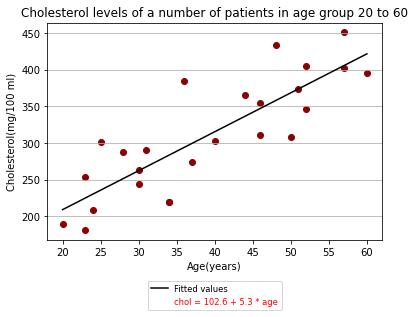

In [35]:

#----
##Challenge 4B Plot a linear model to the dataset

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')


fig = plt.scatter(X, y, color="darkred")

## Create a range of points. Compute yhat = coeff1 * X + intercep and plot
x = np.linspace( min(X), max(X), np.ptp(X,axis=0)[0])     
#print(x)
# same as: 
x = np.linspace( 20, 60, 20)     
#x
#---
#Challenge 4 Generate a plot silimar to that on slide 54
fig1 = plt.plot(x, model.coef_[0][0] *x + model.intercept_[0], color='black', ls="-", label="Fitted values")
fig1 = plt.plot(x, model.coef_[0][0] *x + model.intercept_[0], color='black', ls="", 
                label="chol = 102.6 + 5.3 * age")
fig1 = plt.title("Cholesterol levels of a number of patients in age group 20 to 60")
fig1 = plt.xlabel("Age(years)")
fig1 = plt.ylabel("Cholesterol(mg/100 ml)")

#add legend
legend2 = plt.legend(loc="lower center", title="", prop=fontP, bbox_to_anchor=(0.5, -0.34))

#l = plt.legend()
legend2.get_texts()[1].set_color("red")

#Turn on the grid
#plt.grid()
ax = plt.axes()        
ax.yaxis.grid() # horizontal lines
#ax.xaxis.grid() # vertical


In [36]:
####Challenge 4C Generate a plot silimar to that on slide 54




## You may use sample code provided here: https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/





## *** William Skipped intentionally  ***




  
<hr style="border:0.1px solid gray; width: 25%;" />

<b style="font-size:40px; color:#822c97">References</b>

* <https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/>

<p /><p />

<hr style="border:0.1px solid #822c97; width: 50%;" />

<center><b style="font-size:25px; color:##556B2F">CONGRATULATION!!!<br>YOU HAVE SUCCESSFULLY COMPLETED CODE ALONG <br />TASK 4 OR MODULE 3 Day 1</b></center>

<a id="slide66"></a>

<hr style="color:#FE0000;border:0.5px solid red" />


### 5 Nonparametric statistics

<p />


#### 5.A  <b style="font-size:15px; color:#FE0000;"><em>Bootstrap</em></b> – randomly select an observation from sample data <b style="font-size:15px; color:#FE0000;"><em>with replacement</em></b>

<p />


We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slide 68</em></b> to complete **Task 5** for Module 3 Day 2


####  Recall: Figure on  <b style="font-size:15px; color:#FE0000;"><em> Slide 68</em><b/>
<p \>
 
<center><img src="Figures/slide68.PNG" style="float: center; height: 320px"></center>

In [37]:
#5a Use bootstrapping to compute the *95%* confidence interval (CI) for the average dBP
import numpy as np

#Use this sample code to solve problem 5a
np.random.seed(123)

# Uncomment and run the following line
# ?np.random.choice

#See what np.random does
temp_sample= np.random.choice(a= np.arange(10), size=3, replace=True, p=None)
print("\n 1: temp_sample = %s \n--\n" %(temp_sample))

temp_sample= np.random.choice(a= np.arange(10), size=5, replace=True, p=None)
print("\n 1: temp_sample = %s \n--\n" %(temp_sample))


#--
#5a.i  
# Draw a 10 random samples each of size 5 from the dBP data with replacement and append mean to mean_dBP .

#mean_dBP_samples is an empty list, mysample_size=5, replications=10 
mean_dBP_samples, mysample_size, replications = [], 5, 10 

#Use the for loop to poplutate the mean_dBP_samples data 
for i in range(replications):
    temp_sample = np.random.choice(a=dBP, size=mysample_size, replace=True, p=None)
    sample_mean = np.mean(temp_sample)
    #append the mean to the mean_dBP_samples
    mean_dBP_samples.append(sample_mean)
    
    
#5a.ii
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_dBP_samples)
boot_95_ci = np.percentile(mean_dBP_samples, [2.5, 97.5])
print("\n---\nBootstrapped dBP Sample_size = {}   | Mean = {}   |  95% CI = {}\n\n".format(mysample_size, boot_mean, boot_95_ci))



#5a.ii Try with different sample sizes 
# Trivial -- simply change
# #mean_dBP_samples is an empty list, mysample_size=5, replications=10 
mean_dBP_samples, mysample_size, replications = [], 15, 10 

#Then paset the code in 5a.i here or even better write a function and make a call to 
#the function with diffrent values 


#5a.iii Document your obsertations





 1: temp_sample = [2 2 6] 
--


 1: temp_sample = [1 3 9 6 1] 
--


---
Bootstrapped dBP Sample_size = 5   | Mean = 75.44   |  95% CI = [70.23 79.53]




In [38]:
#---
#Challenge 5 Modify code to compute the *95%* confidence interval (CI) for the `median` dBP 


## Median

median_dBP_samples, mean_dBP_samples, mysample_size, replications = [], [], 15, 10    #median_dBP_samples & mean_dBP_samples are empty lists, mysample_size=5, replications=1000 

for i in range(replications):
    temp_sample = np.random.choice(a=dBP, size=mysample_size, replace=True, p=None)
    mean_dBP_samples.append(np.mean(temp_sample))       #sample mean
    median_dBP_samples.append(np.median(temp_sample))     #sample median
    
# Calculate bootstrapped statistics and their 95% confidence intervals.
est_mean           = np.mean(dBP)
boot_mean          = np.mean(mean_dBP_samples)
boot_95_mean_ci    = np.percentile(mean_dBP_samples, [2.5, 97.5])
mean_ci_length     = boot_95_mean_ci[1] - boot_95_mean_ci[0] 

est_median         = np.median(dBP)
boot_median        = np.median(median_dBP_samples)
boot_95_median_ci  = np.percentile(median_dBP_samples, [2.5, 97.5])
median_ci_length   = boot_95_median_ci[1] - boot_95_median_ci[0] 


print("                            Bootstrapped")
print("________________________________________________________________________________________________________")
print(" Sample Size |  Replications | Actual estimate   |   Sample Estimate  |       95% CI      |  Length CI  |")
print("_____________|_______________|___________________|____________________|___________________|_____________|")

print(f'     {mysample_size:3d}     | {replications:8d}      |   Mean = {est_mean:.2f}    |   Mean = {boot_mean:.2f}    |  {boot_95_mean_ci}    |   {mean_ci_length:.1f}')
print(f'     {mysample_size:3d}     | {replications:8d}      | Median = {est_median:.2f}    |   Mean = {boot_median:.2f}    |  {boot_95_median_ci}   |   {median_ci_length:.1f}')


                            Bootstrapped
________________________________________________________________________________________________________
 Sample Size |  Replications | Actual estimate   |   Sample Estimate  |       95% CI      |  Length CI  |
_____________|_______________|___________________|____________________|___________________|_____________|
      15     |       10      |   Mean = 76.32    |   Mean = 76.27    |  [72.12       81.37166667]    |   9.3
      15     |       10      | Median = 74.00    |   Mean = 73.00    |  [70.225 84.1  ]   |   13.9


<a id="slide69"></a>

***


#### 5.B  <b style="font-size:15px; color:#FE0000;"><em>Jacknife</em></b> – leave-out-one

<p />


We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slide 69</em></b> to complete **Task 5B** for Module 3 Day 2


####  Recall: Figure on  <b style="font-size:15px; color:#FE0000;"><em> Slide 69</em><b/>
<p \>
 
<center><img src="Figures/slide69.PNG" style="float: center; height: 360px"></center>

In [39]:
np.random.seed(123)

# Leave one observation out from dPB data to get the jackknife sample and store the mean value fo each sample
mean_dBP_samples, replications = [], len(dBP)   #mean_dBP_samples are empty lists, replications=1000 

index = np.arange(replications)                      # array([  0,   1,   2,   3, .... 143])

print(f'\n Original data:\n{dBP}')

for i in range(replications):
    jk_sample = dBP[index != i]
    mean_dBP_samples.append(np.mean(jk_sample))      #compute statistic
    
    # for debugging purposes only print out a fee sample
    if i < 4 or i > 140:
        print(f'\n Leaving out index {i} | Jacknife estimate: {np.mean(jk_sample):.2f}\n Jacknife sample data:\n{jk_sample}')    

# The jackknife estimate is the mean of dBP from each sample
mean_dBP_jk = np.mean(np.array(mean_dBP_samples))
print(f'\n\n-----\n\nFinally:\n\nThe true Jackknife estimate of the mean dBP = {mean_dBP_jk:.2f}\n')



 Original data:
[ 73  59  67  68  68  75  97  73  94  68  55  65  42  77  76  74  93  91
  58  92  73  73  68  81  73  65  66  70  92  72  72  62  78  86  73  85
  67  69  80  72  71  82  57  82  99  89  85  90  84  91  98  84  95  67
  74  73  71 100  80  89  75  71  70  65  69  71  65  90  90  77  69  64
  80  69  74  81  98  61  79  73  82  88  62  81  78  62  71  54  74  94
  73  83  74  72  73  77  64  76  74  67  90  75  91  64  82  56  78  91
  73  89  59  83 100  76  79  70  77  85  73  95  70  91  84  87  60  66
  63  60  71  90  84  86  92  79  73  63  82  76  80  79  64  88  70  73]

 Leaving out index 0 | Jacknife estimate: 76.34
 Jacknife sample data:
[ 59  67  68  68  75  97  73  94  68  55  65  42  77  76  74  93  91  58
  92  73  73  68  81  73  65  66  70  92  72  72  62  78  86  73  85  67
  69  80  72  71  82  57  82  99  89  85  90  84  91  98  84  95  67  74
  73  71 100  80  89  75  71  70  65  69  71  65  90  90  77  69  64  80
  69  74  81  98  61  79  73  82  

<p /><p />

***

<b style="font-size:40px; color:#00FF00">References</b>

* <https://goodboychan.github.io/chans_jupyter/python/datacamp/statistics/modeling/2020/06/22/01-Resampling-methods.html#Bootstrapping>
* <https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html>
* <https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/>



# Additional References

* <https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce>

* <https://towardsdatascience.com/demystifying-hypothesis-testing-with-simple-python-examples-4997ad3c5294>


***
   
<p /><p />


<hr style="color:#FE0000;border:0.5px solid red;width:75%" />

<p /><p />


<center><b style="font-size:30px; color:#013220">CONGRATULATION!!!<br \><br \><br \><br \>YOU HAVE SUCCESSFULLY COMPLETED <br \><br \>ALL YOUR CODING TASKS FOR <br \><br \>MODULE 3</b></center>



<hr style="color:#FE0000;border:0.5px solid red" />

<p /><p />

